In [126]:
from typing import Any
import pandas as pd
from scipy.stats import ttest_ind,shapiro, levene
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

avg_revenue_cohort_A_all_users_by_day: Any
avg_revenue_cohort_B_all_users_by_day: Any
%store -r avg_revenue_cohort_A_all_users_by_day
%store -r avg_revenue_cohort_B_all_users_by_day

In [127]:
# read data
data = pd.read_csv("./data/data.csv",delimiter=";")
data_cohort_A = data[data['AB_Cohort'] == 'A']
data_cohort_B = data[data['AB_Cohort'] == 'B']

In [128]:
#1.1 NEW t-test to identify statistical significance of differences between cohorts A and B in the maximum levels reached by users on the last day.
#We filter the data, leaving only records for the last day of life (Retention = 7)
data_last_day_A = data[(data['AB_Cohort'] == 'A') & (data['Retention'] == 7)]
data_last_day_B = data[(data['AB_Cohort'] == 'B') & (data['Retention'] == 7)]

# Select the MaxLevelPassed column for each cohort on the last day
max_level_last_day_A = data_last_day_A['MaxLevelPassed']
max_level_last_day_B = data_last_day_B['MaxLevelPassed']

# Checking normality of distribution
_, p_value_shapiro_A = shapiro(max_level_last_day_A)
_, p_value_shapiro_B = shapiro(max_level_last_day_B)

# Testing for equality of variances
_, p_value_levene = levene(max_level_last_day_A, max_level_last_day_B)

# Significance level for both tests
alpha = 0.05

# Output of results
if p_value_shapiro_A > alpha and p_value_shapiro_B > alpha:
    print("Both cohorts A and B have normally distributed data.")
else:
    print("At least one cohort does not have normally distributed data.")

if p_value_levene > alpha:
    print("The variances of both cohorts A and B are equal (homoscedastic).")
else:
    print("The variances of cohorts A and B are not equal (heteroscedastic).")

# Conduct a t-test to compare MaxLevelPassed between cohorts A and B on the last day
t_statistic, p_value = ttest_ind(max_level_last_day_A, max_level_last_day_B, equal_var=False)

# We display the results
print("T-test results for MaxLevelPassed on the last day:")
print("T-statistic:", t_statistic)
print("p-value:", p_value)

# Determining the level of significance
alpha = 0.05

# Checking for statistical significance
if p_value < alpha:
    print("The difference in MaxLevelPassed between cohorts A and B is statistically significant.")
else:
    print("There is no statistically significant difference in MaxLevelPassed between cohorts A and B.")


At least one cohort does not have normally distributed data.
The variances of cohorts A and B are not equal (heteroscedastic).
T-test results for MaxLevelPassed on the last day:
T-statistic: -7.263489292894719
p-value: 5.73762768217606e-13
The difference in MaxLevelPassed between cohorts A and B is statistically significant.


In [129]:
# 1.1 NEW. Mann-Whitney U test to test the significance of the difference in the mean maximum level achieved
from scipy.stats import mannwhitneyu

# We filter the data, leaving only records for the last day of life (Retention = 7)
data_last_day_A = data[(data['AB_Cohort'] == 'A') & (data['Retention'] == 7)]
data_last_day_B = data[(data['AB_Cohort'] == 'B') & (data['Retention'] == 7)]

# Select the MaxLevelPassed column for each cohort on the last day
max_level_last_day_A = data_last_day_A['MaxLevelPassed']
max_level_last_day_B = data_last_day_B['MaxLevelPassed']

# Checking for the number of values in each sample
min_sample_size = 3

if len(max_level_last_day_A) < min_sample_size or len(max_level_last_day_B) < min_sample_size:
    print("The sample size in one or both cohorts is below the minimum required for the Mann-Whitney U-test.")
else:
    # Performing a Mann-Whitney U test
    stat, p = mannwhitneyu(max_level_last_day_A, max_level_last_day_B, alternative='two-sided')

    # Determining the significance level
    alpha = 0.05

    # Test results output
    print("Mann-Whitney U-test results for MaxLevelPassed on the last day:")
    print("U Statistic:", stat)
    print("p-value:", p)

    # Testing for statistical significance
    if p < alpha:
        print("The difference in MaxLevelPassed between cohorts A and B is statistically significant.")
    else:
        print("There is no statistically significant difference in MaxLevelPassed between cohorts A and B.")


Mann-Whitney U-test results for MaxLevelPassed on the last day:
U Statistic: 362899.5
p-value: 5.813316340097139e-11
The difference in MaxLevelPassed between cohorts A and B is statistically significant.


In [130]:
#2.2 The Mann-Whitney U test tests the statistical significance of the differences between two samples (in this case, cohort A and cohort B) in terms of the average amount of gold received daily per Facebook login for "All Users".

# Import the required function
from scipy.stats import mannwhitneyu

# We filter the data for each cohort and select only the required column
gold_sum_daily_A = data_cohort_A.groupby(['Retention', 'User_id'])['Get_Faceb'].sum().reset_index()
gold_mean_daily_A = gold_sum_daily_A.groupby(['Retention'])['Get_Faceb'].mean()

gold_sum_daily_B = data_cohort_B.groupby(['Retention', 'User_id'])['Get_Faceb'].sum().reset_index()
gold_mean_daily_B = gold_sum_daily_B.groupby(['Retention'])['Get_Faceb'].mean()

# Checking for the number of values ​​in each sample
min_sample_size = 3

if len(gold_mean_daily_A) < min_sample_size or len(gold_mean_daily_B) < min_sample_size:
    print("The sample size in one or both cohorts is below the minimum required for the Mann-Whitney U-test.")
else:
    # Performing a Mann-Whitney U test
    stat, p = mannwhitneyu(gold_mean_daily_A, gold_mean_daily_B, alternative='two-sided')

    # Determining the significance level
    alpha = 0.05

    # Test results output
    print("Mann-Whitney U-test results for Get_Faceb - Daily - All Users:")
    print("U Statistic:", stat)
    print("p-value:", p)

    # Testing for statistical significance
    if p < alpha:
        print("The difference in Get_Faceb - Daily - All Users between cohorts A and B is statistically significant.")
    else:
        print("There is no statistically significant difference in Get_Faceb - Daily - All Users between cohorts A and B.")


Mann-Whitney U-test results for Get_Faceb - Daily - All Users:
U Statistic: 33.0
p-value: 0.959129759129759
There is no statistically significant difference in Get_Faceb - Daily - All Users between cohorts A and B.


In [131]:
# 3 This test, the Mann-Whitney U test, tests the statistical significance of the difference between two samples (in this case, cohort A and cohort B) in the average income for "All Users" by day.

# Importing the required function
from scipy.stats import mannwhitneyu

# We calculate the average income by day for "All Users" for each cohort
revenue_data_per_day_A_all_users = avg_revenue_cohort_A_all_users_by_day['SumRevenue']
revenue_data_per_day_B_all_users = avg_revenue_cohort_B_all_users_by_day['SumRevenue']

# Checking for the number of values in each sample
min_sample_size = 3

if len(revenue_data_per_day_A_all_users) < min_sample_size or len(revenue_data_per_day_B_all_users) < min_sample_size:
    print("The sample size in one or both cohorts is below the minimum required for the Mann-Whitney U-test.")
else:
    # Performing a Mann-Whitney U test
    stat, p = mannwhitneyu(revenue_data_per_day_A_all_users, revenue_data_per_day_B_all_users, alternative='two-sided')

    # Determining the significance level
    alpha = 0.05

    # Test results output
    print("Mann-Whitney U-test results for Average Revenue per Day (All Users):")
    print("U Statistic:", stat)
    print("p-value:", p)

    # Testing for statistical significance
    if p < alpha:
        print("The difference in Average Revenue per Day (All Users) between cohorts A and B is statistically significant.")
    else:
        print("There is no statistically significant difference in Average Revenue per Day (All Users) between cohorts A and B.")



Mann-Whitney U-test results for Average Revenue per Day (All Users):
U Statistic: 7.0
p-value: 0.006993006993006993
The difference in Average Revenue per Day (All Users) between cohorts A and B is statistically significant.


C:\Users\User\AppData\Local\Temp\ipykernel_2192\4077086393.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_cohort_A = data_cohort_A.corr()
C:\Users\User\AppData\Local\Temp\ipykernel_2192\4077086393.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_cohort_B = data_cohort_B.corr()


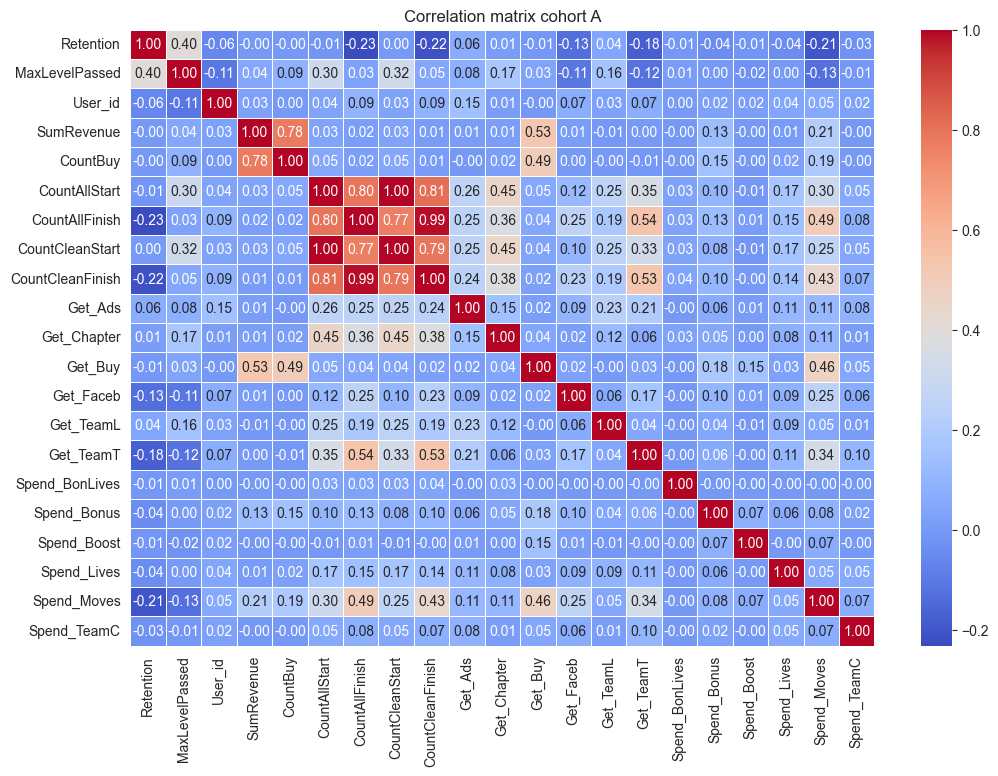

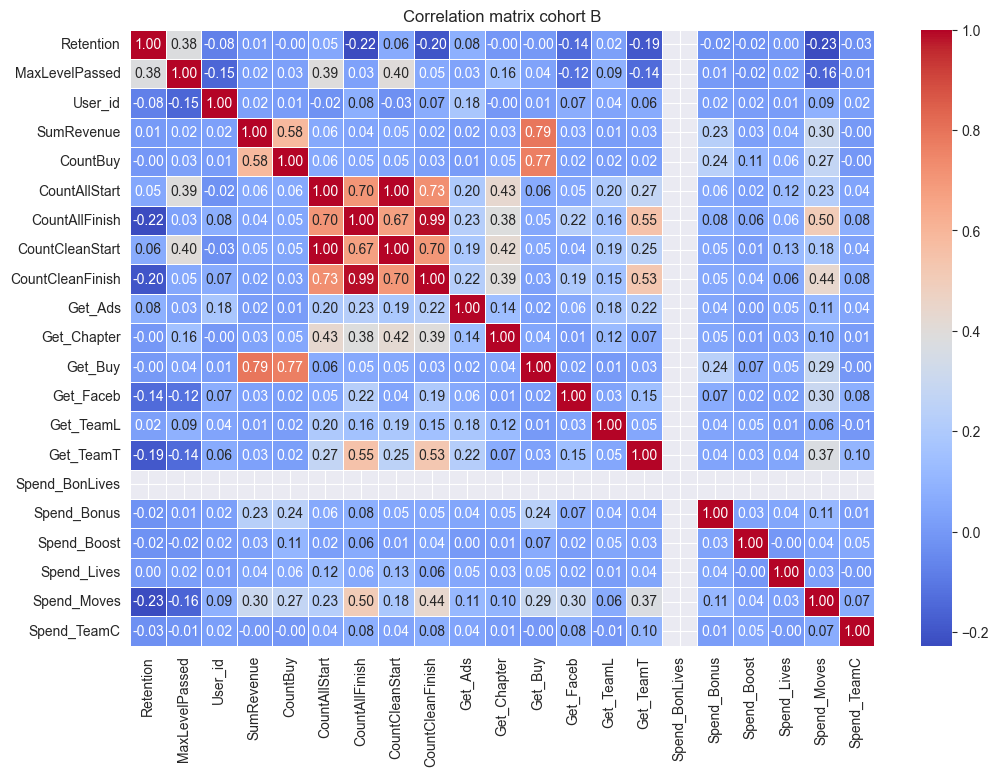

In [132]:
# 4 Compute the correlation matrix for both cohorts
correlation_matrix_cohort_A = data_cohort_A.corr()
correlation_matrix_cohort_B = data_cohort_B.corr()

# Create subheadings for heat maps
titles = ['Correlation matrix cohort A', 'Correlation matrix cohort B']

# Create heat maps to visualize correlations in one loop
for i, correlation_matrix in enumerate([correlation_matrix_cohort_A, correlation_matrix_cohort_B]):
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title(titles[i])
    plt.show()


In [133]:
# Demonstration of the absence of Spend_BonLives in cohort_B
print(data_cohort_B["Spend_BonLives"].sum())
print(data_cohort_A["Spend_BonLives"].sum())

0
1000


In [134]:
# 5 Aggregation of data for subsequent use in ml models
def aggregate_cohort_data(data):
    aggregated_data = data.groupby('User_id').agg({
        'Retention': 'max',
        'MaxLevelPassed': 'max',
        'AB_Cohort': 'first',
        'SumRevenue': 'sum',
        'CountBuy': 'sum',
        'CountAllStart': 'sum',
        'CountAllFinish': 'sum',
        'CountCleanStart': 'sum',
        'CountCleanFinish': 'sum',
        'Get_Ads': 'sum',
        'Get_Chapter': 'sum',
        'Get_Buy': 'sum',
        'Get_Faceb': 'sum',
        'Get_TeamL': 'sum',
        'Get_TeamT': 'sum',
        'Spend_BonLives': 'sum',
        'Spend_Bonus': 'sum',
        'Spend_Boost': 'sum',
        'Spend_Lives': 'sum',
        'Spend_Moves': 'sum',
        'Spend_TeamC': 'sum'
    }).reset_index()

    return aggregated_data

# Apply the function to data_cohort_A
aggregated_data_cohort_A = aggregate_cohort_data(data_cohort_A)

# Applying the function to data_cohort_B
aggregated_data_cohort_B = aggregate_cohort_data(data_cohort_B)

# Save data_scaled_cohort_A to CSV
aggregated_data_cohort_A.to_csv('./data_proc/aggregated_data_cohort_A.csv', index=False)

# Save data_scaled_cohort_B to CSV
aggregated_data_cohort_B.to_csv('./data_proc/aggregated_data_cohort_B.csv', index=False)


In [135]:
# 6 scaling with choice of method
def scale_dataframe(df, ignore_columns=[]):
    columns_to_scale = [col for col in df.columns if col not in ignore_columns]
    scaler = RobustScaler()
    scaled_data = scaler.fit_transform(df[columns_to_scale])
    # Update the values in the columns that need to be scaled
    df.loc[:, columns_to_scale] = scaled_data
    return df
data_scaled_cohort_A = scale_dataframe(aggregated_data_cohort_A,ignore_columns = ["User_id","AB_Cohort","Retention"])
data_scaled_cohort_B = scale_dataframe(aggregated_data_cohort_B,ignore_columns = ["User_id","AB_Cohort","Retention"])

print(data_scaled_cohort_A.head())
print(data_scaled_cohort_B.head())

# Save data_scaled_cohort_A to CSV
data_scaled_cohort_A.to_csv('./data_proc/data_scaled_cohort_A.csv', index=False)

# Save data_scaled_cohort_B to CSV
data_scaled_cohort_B.to_csv('./data_proc/data_scaled_cohort_B.csv', index=False)


   User_id  Retention  MaxLevelPassed AB_Cohort  SumRevenue  CountBuy  \
0        1          0         0.58824         A     0.00000   0.00000   
1        2          0         0.58824         A     0.00000   0.00000   
2        3          0        -0.32353         A     0.00000   0.00000   
3        4          0        -0.67647         A     0.00000   0.00000   
4        5          0         0.26471         A     0.00000   0.00000   

   CountAllStart  CountAllFinish  CountCleanStart  CountCleanFinish  ...  \
0       -0.25455        -0.38095         -0.23404          -0.35294  ...   
1       -0.25455        -0.38095         -0.23404          -0.35294  ...   
2        0.07273         0.33333          0.06383           0.29412  ...   
3       -0.25455        -0.38095         -0.23404          -0.35294  ...   
4       -0.25455        -0.38095         -0.23404          -0.35294  ...   

   Get_Buy  Get_Faceb  Get_TeamL  Get_TeamT  Spend_BonLives  Spend_Bonus  \
0  0.00000    0.00000    0.0

C:\Users\User\AppData\Local\Temp\ipykernel_2192\1828443976.py:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, columns_to_scale] = scaled_data
C:\Users\User\AppData\Local\Temp\ipykernel_2192\1828443976.py:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, columns_to_scale] = scaled_data


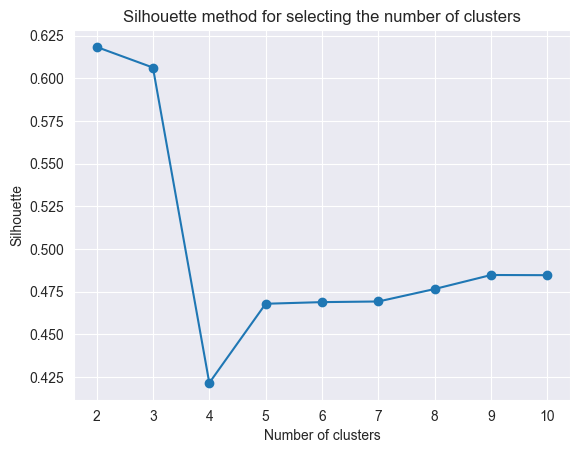

   Cluster  MaxLevelPassed  SumRevenue  CountBuy  CountAllStart  \
0        0         1.05144    36.60433   0.14529        3.52668   
1        1        -0.08248     0.43990   0.00325        0.12320   

   CountAllFinish  User_id  
0         2.03748      647  
1         0.04323     3694  


In [136]:
# 7  Clustering
from sklearn.metrics import silhouette_score

# List to save silhouette values
silhouette_scores = []

# Selecting Features for Clustering
features = aggregated_data_cohort_B[['MaxLevelPassed', 'SumRevenue', 'CountBuy', 'CountAllStart', 'CountAllFinish']]
# Data standardization (important for KMeans)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Try different numbers of clusters
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=30, n_init=5, random_state=0)
    cluster_labels = kmeans.fit_predict(scaled_features)

    # Calculate silhouette for current number of clusters
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette vs. Number of Clusters
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette method for selecting the number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette')
plt.show()

#Select the number of clusters with the largest silhouette value
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2  # +2, так как начинали с 2 кластеров

# Clustering data with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=30, n_init=5, random_state=0)
clusters = kmeans.fit_predict(scaled_features)

# Adding a column with clusters to the source data
aggregated_data_cohort_B['Cluster'] = clusters

# Displaying statistics on clusters
cluster_stats = aggregated_data_cohort_B.groupby('Cluster').agg({
    'MaxLevelPassed': 'mean',
    'SumRevenue': 'mean',
    'CountBuy': 'mean',
    'CountAllStart': 'mean',
    'CountAllFinish': 'mean',
    'User_id': 'count'
}).reset_index()

print(cluster_stats)
